# Deep Learning Regression with Admissions Data_version1

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

# Load admissions data
This dataset has nine different columns:

- Serial No.: Index of each row (1-500)

- GRE Score: GRE test score (out of 340)

- TOEFL Score: TOEFL test score (out of 120)

- University Rating: Evaluated university rating (out of 5)

- SOP: Statement of Purpose Strength (out of 5)

- LOR: Letter of Recommendation Strength (out of 5)

- CGPA: Undergraduate GPA (out of 10)

- Research: Has research experience (either 0 or 1)

- Chance of Admit: Applicant’s chance of being admitted (ranging from 0 to 1)

In [84]:
df = pd.read_csv("admissions_data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [85]:
df = df.drop(columns = ["Serial No."])
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [86]:
print(df.shape)

(500, 8)


# Prepare and split data

Our feature parameters should be:

- GRE Score: GRE test score (out of 340)
- TOEFL Score: TOEFL test score (out of 120)
- University Rating: Evaluated university rating (out of 5)
- SOP: Statement of Purpose Strength (out of 5)
- LOR: Letter of Recommendation Strength (out of 5)
- CGPA: Undergraduate GPA (out of 10)
- Research: Has research experience (either 0 or 1) Do you notice any that are not included?

Your label parameter should be: Chance of Admit: Applicant’s chance of being admitted (ranging from 0 to 1)

Use the iloc function from the pandas library to split up the features and labels.

Luckily, there are no categorical variables in this dataset, so there is no need to perform one-hot encoding.

Split it up the data into feature parameters and the labels.

You are creating a model that predicts an applicant’s likelihood of being admitted to a master’s program, so take some time to look at the features of your model and which column you are trying to predict. Also consider if there are any dataset features that should not be included as a predictor.

Make sure all of your variables are numerical.

If there are any categorical variables, be sure to map them to numerical values, using techniques such as one-hot-encoding, so they can be used in a regression analysis.

In [87]:
labels = df.iloc[:, -1]
labels

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [88]:
feature = df.iloc[:, : -1]
feature

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


### There are no categorical variables in this dataset, so do not have to perform one-hot encoding. 
Since you are creating a learning model, you must have a training set and a test set. Remember that this allows you to measure the effectiveness of your model.

You have created two DataFrames: one for features DataFrame and one for labels. Now, you must split each of these into a training set and a test set.

In [89]:
#split our training and test set
features_train, features_test, labels_train, labels_test = train_test_split(
    feature, 
    labels, 
    test_size = 0.33,
    random_state = 42
)

### If you look through the admissions_data.csv, you may notice that there are many different scales being used. 
For example, the GRE Score is out of 340 while the University Rating is out of 5. Can you imagine why this might be a problem when using a regression learning model? You should either scale or normalize your data so that all columns/features have equal weight in the learning model.

In [90]:
numerical_features = feature.select_dtypes(
    include = ['float64', 'int64']
)
numerical_columns = numerical_features.columns

ct = ColumnTransformer(
    [(
        "only numeric", 
        StandardScaler(), 
        numerical_columns 
    )], 
    remainder = "passthrough"
)

features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

In [91]:
features_train_norm = pd.DataFrame(
  features_train_scaled, 
  columns = features_train.columns
)
features_train_norm

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.525175,-0.706986,-0.082885,-1.385311,0.538819,-0.835766,-1.144703
1,0.477036,0.276434,1.652517,1.123225,-0.001613,0.363045,-1.144703
2,-0.798505,-1.034792,-0.950586,-0.381897,0.538819,-1.156574,-1.144703
3,0.203706,-0.706986,-0.082885,-0.883604,0.538819,0.295507,0.873589
4,1.297027,1.423757,1.652517,1.624933,1.619684,1.342356,0.873589
...,...,...,...,...,...,...,...
330,1.114806,0.604240,0.784816,1.123225,1.079251,1.004663,0.873589
331,-0.980725,-0.379179,-0.950586,-0.883604,-0.542045,-0.616265,0.873589
332,-1.345165,-1.362599,-1.818287,-1.385311,-1.622910,-2.254077,-1.144703
333,-0.707395,-0.379179,-0.950586,-0.883604,0.538819,-1.528037,-1.144703


# Create a neural network model to perform a regression analysis on the admission data.

When designing your own neural network model, consider the following:

- The shape of your input
- Adding hidden layers as well as how many neurons they have
- Including activation functions
- The type of loss function and metrics you use
- The type of gradient descent optimizer you use
- Your learning rate

In [92]:
def design_model(X, learning_rate):
    layers = tf.keras.layers
    Dense = tf.keras.layers.Dense

    model = tf.keras.models.Sequential()
    input = layers.InputLayer(input_shape = (X.shape[1], ))
    model.add(input)
    
    model.add(
        Dense(
            7, 
            activation = "relu" 
        )
    )

    model.add(Dense(1))
    #print(model.summary())

    opt = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    model.compile(
        loss = "mse",  
        metrics = ["mae"], 
        optimizer = opt
    )

    return model

In [93]:
def fit_model(features_train, labels_train, learning_rate, num_epochs):
    model = design_model(features_train, learning_rate)
    stop = tf.keras.callbacks.EarlyStopping(
        monitor = "val_loss", 
        mode = "min",
        verbose = 1, 
        patience = 40 
    )
    history = model.fit(
        features_train,
        labels_train,
        epochs = num_epochs,
        batch_size = 16,
        verbose = 0,
        validation_split = 0.2,        #  20% of the data would be allocated for validation
        callbacks = [stop]
    )
    return history

# Testing and Evaluation of the model

It’s time to test out the model you created!

Fit your model with your training set and test it out with your test set.

It’s okay if it is not that accurate right now. You can play around with your model and tweak it to increase its accuracy.

In [59]:
learning_rate = 0.01
num_epochs = 1000
history = fit_model(features_train_scaled, labels_train, learning_rate, num_epochs)
for property, value in vars(history).items():
    #print(property, ":", value)
    pass

Epoch 00287: early stopping


In [94]:
val_mse, val_mae = history.model.evaluate(
  features_test, 
  labels_test, 
  verbose = 0
)

print("MAE: ", val_mae)

MAE:  0.7376595


In [95]:
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


# You have tested out your model. Now is the time to adjust your model’s hyperparameters. You have a lot of choices to make. You can choose:

- the number of epochs
- the size of your batch_size
- to add more hidden layers
- your type of optimizer and/or activation functions.

Have fun in the hyperparameter playground. Test things out and see what works and what does not work. See what makes your model optimized between speed and accuracy. You have complete creative power!

# Visualization

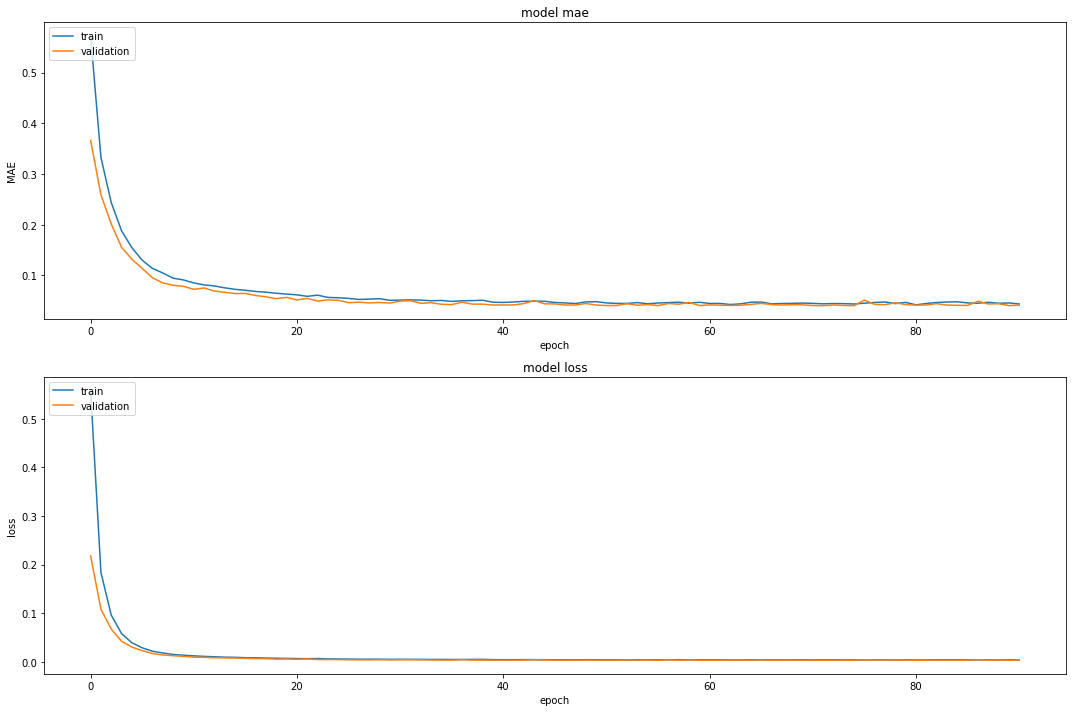

In [96]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mean_absolute_error'])
ax1.plot(history.history['val_mean_absolute_error'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
 
  # Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
 
# used to keep plots from overlapping each other  
fig.tight_layout()